# Tutorial
This document aims to give a full overview of the API and will be an appendix to the dissertation.

## To-Do:
* Object for multisample
    * Plots show mean + stdev bands
* Frequency detection
    Calculates frequency of signals (sine-like and more degenerate), e.g. to find DRAM refresh time or period of a periodic pattern like it occurs in stencil traces
* Some multivariate plots of aggregations, i.e. mean energy vs OMP threads vs dtype

In [1]:
%pylab inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

import powervisualisation as pv

Populating the interactive namespace from numpy and matplotlib


In [2]:
T = pv.Trace("data/sampledata.hdf5")
T

<powervisualisation.trace.Trace instance at 0x10d7dd7e8>

In [3]:
T.samplecount, T.samplerate, T.time

(98304, 500000.0, 0.196608)

In [4]:
T.sensors

[u'sensor_12v',
 u'sensor_3v3',
 u'sensor_5v',
 u'sensor_cpu0',
 u'sensor_cpu1',
 u'sensor_dram00',
 u'sensor_dram01',
 u'sensor_dram10',
 u'sensor_dram11']

In [5]:
T.attributes

{u'Machine': 'intel1'}

In [6]:
# validate file
T.check_format()

True

In [7]:
T.print_samples_by_sensor()

<HDF5 group "/sensor_12v" (2 members)> [(98304,), (98304,)]
<HDF5 group "/sensor_3v3" (2 members)> [(98304,), (98304,)]
<HDF5 group "/sensor_5v" (2 members)> [(98304,), (98304,)]
<HDF5 group "/sensor_cpu0" (2 members)> [(65536,), (65536,)]
<HDF5 group "/sensor_cpu1" (2 members)> [(65536,), (65536,)]
<HDF5 group "/sensor_dram00" (2 members)> [(65536,), (65536,)]
<HDF5 group "/sensor_dram01" (2 members)> [(65536,), (65536,)]
<HDF5 group "/sensor_dram10" (2 members)> [(65536,), (65536,)]
<HDF5 group "/sensor_dram11" (2 members)> [(65536,), (65536,)]


In [8]:
T.idle_as_df()

sensor_12v       23.043167
sensor_3v3       10.871183
sensor_5v        14.420316
sensor_cpu0      37.731823
sensor_cpu1      40.084969
sensor_dram00     0.085811
sensor_dram01     0.084079
sensor_dram10     0.091296
sensor_dram11     0.097277
dtype: float32

In [9]:
T.aggregate()

{u'sensor_12v': {'count': 1004,
  'max': 24.183386,
  'mean': 23.550127,
  'min': 23.043167,
  'std': 0.13310222},
 u'sensor_3v3': {'count': 1004,
  'max': 11.106612,
  'mean': 10.94273,
  'min': 10.871183,
  'std': 0.024831671},
 u'sensor_5v': {'count': 1004,
  'max': 21.36031,
  'mean': 15.279408,
  'min': 14.420316,
  'std': 1.6282862},
 u'sensor_cpu0': {'count': 669,
  'max': 43.356262,
  'mean': 40.457916,
  'min': 37.731823,
  'std': 0.78186971},
 u'sensor_cpu1': {'count': 669,
  'max': 50.621803,
  'mean': 46.713421,
  'min': 40.084969,
  'std': 1.5379509},
 u'sensor_dram00': {'count': 669,
  'max': 1.4009588,
  'mean': 0.44148818,
  'min': 0.085811362,
  'std': 0.38235804},
 u'sensor_dram01': {'count': 669,
  'max': 1.2459625,
  'mean': 0.43932322,
  'min': 0.08407867,
  'std': 0.3373352},
 u'sensor_dram10': {'count': 669,
  'max': 0.68308407,
  'mean': 0.23254003,
  'min': 0.091295779,
  'std': 0.1352523},
 u'sensor_dram11': {'count': 669,
  'max': 0.60402423,
  'mean': 0.2488

In [10]:
T.power_corr()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sensor_12v</th>
      <th>sensor_3v3</th>
      <th>sensor_5v</th>
      <th>sensor_cpu0</th>
      <th>sensor_cpu1</th>
      <th>sensor_dram00</th>
      <th>sensor_dram01</th>
      <th>sensor_dram10</th>
      <th>sensor_dram11</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>sensor_12v</th>
      <td>1.000000</td>
      <td>0.078765</td>
      <td>0.060105</td>
      <td>0.041079</td>
      <td>-0.010096</td>
      <td>-0.004488</td>
      <td>0.003675</td>
      <td>-0.019966</td>
      <td>0.011590</td>
    </tr>
    <tr>
      <th>sensor_3v3</th>
      <td>0.078765</td>
      <td>1.000000</td>
      <td>0.046326</td>
      <td>0.013944</td>
      <td>0.003611</td>
      <td>-0.051251</td>
      <td>-0.058950</td>
      <td>-0.071182</td>
      <td>-0.046469</td>
    </tr>
    <tr>
      <th>sensor_5v</th>
      <td>0.060105</td>
      <td>0.046326</td>
      <td>1.000000</td>
      <td>-0.039444</td>
      <td>0.008144</td>
      <td>-0.076041</td>
      <td>-0.060803</td>
      <td>-0.027956</td>
      <td>-0.017831</td>
    </tr>
    <tr>
      <th>sensor_cpu0</th>
      <td>0.041079</td>
      <td>0.013944</td>
      <td>-0.039444</td>
      <td>1.000000</td>
      <td>0.280647</td>
      <td>-0.001164</td>
      <td>0.000230</td>
      <td>-0.082558</td>
      <td>-0.041359</td>
    </tr>
    <tr>
      <th>sensor_cpu1</th>
      <td>-0.010096</td>
      <td>0.003611</td>
      <td>0.008144</td>
      <td>0.280647</td>
      <td>1.000000</td>
      <td>-0.041953</td>
      <td>-0.058748</td>
      <td>-0.003860</td>
      <td>-0.039048</td>
    </tr>
    <tr>
      <th>sensor_dram00</th>
      <td>-0.004488</td>
      <td>-0.051251</td>
      <td>-0.076041</td>
      <td>-0.001164</td>
      <td>-0.041953</td>
      <td>1.000000</td>
      <td>0.948909</td>
      <td>0.235575</td>
      <td>0.173116</td>
    </tr>
    <tr>
      <th>sensor_dram01</th>
      <td>0.003675</td>
      <td>-0.058950</td>
      <td>-0.060803</td>
      <td>0.000230</td>
      <td>-0.058748</td>
      <td>0.948909</td>
      <td>1.000000</td>
      <td>0.227631</td>
      <td>0.189498</td>
    </tr>
    <tr>
      <th>sensor_dram10</th>
      <td>-0.019966</td>
      <td>-0.071182</td>
      <td>-0.027956</td>
      <td>-0.082558</td>
      <td>-0.003860</td>
      <td>0.235575</td>
      <td>0.227631</td>
      <td>1.000000</td>
      <td>0.438588</td>
    </tr>
    <tr>
      <th>sensor_dram11</th>
      <td>0.011590</td>
      <td>-0.046469</td>
      <td>-0.017831</td>
      <td>-0.041359</td>
      <td>-0.039048</td>
      <td>0.173116</td>
      <td>0.189498</td>
      <td>0.438588</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sensor_12v</th>
      <th>sensor_3v3</th>
      <th>sensor_5v</th>
      <th>sensor_cpu0</th>
      <th>sensor_cpu1</th>
      <th>sensor_dram00</th>
      <th>sensor_dram01</th>
      <th>sensor_dram10</th>
      <th>sensor_dram11</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1970-01-01 00:00:00.000000</th>
      <td>23.405117</td>
      <td>10.935572</td>
      <td>14.668522</td>
      <td>40.582111</td>
      <td>48.545578</td>
      <td>0.094718</td>
      <td>0.144329</td>
      <td>0.302928</td>
      <td>0.195365</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.000196</th>
      <td>23.411970</td>
      <td>10.928204</td>
      <td>14.564514</td>
      <td>41.075577</td>
      <td>42.573502</td>
      <td>0.089568</td>
      <td>0.476889</td>
      <td>0.286427</td>
      <td>0.332862</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.000392</th>
      <td>23.539795</td>
      <td>10.948936</td>
      <td>14.429039</td>
      <td>40.053539</td>
      <td>40.983818</td>
      <td>0.315360</td>
      <td>0.160847</td>
      <td>0.117962</td>
      <td>0.172689</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.000588</th>
      <td>23.812897</td>
      <td>10.940004</td>
      <td>14.681766</td>
      <td>39.920063</td>
      <td>42.994289</td>
      <td>0.089899</td>
      <td>0.247843</td>
      <td>0.141206</td>
      <td>0.145576</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.000784</th>
      <td>23.563494</td>
      <td>10.969006</td>
      <td>14.531230</td>
      <td>40.143856</td>
      <td>44.568050</td>
      <td>0.805301</td>
      <td>0.709662</td>
      <td>0.433861</td>
      <td>0.378225</td>
    </tr>
  </tbody>
</table>
</div>

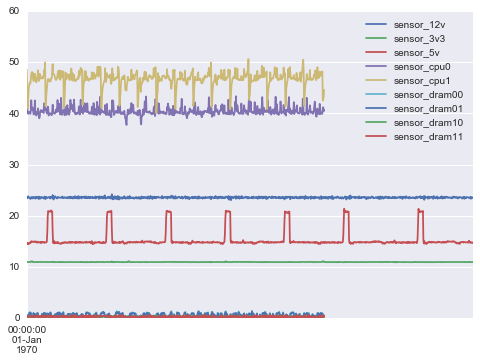

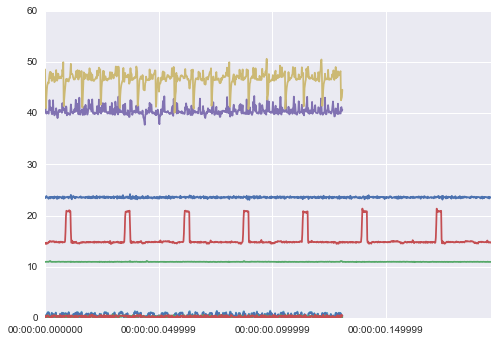

In [11]:
T.power_as_df().plot()

#getting proper axis
pv.timeseries_plot(T.power_as_df())

T.power_as_df().head()

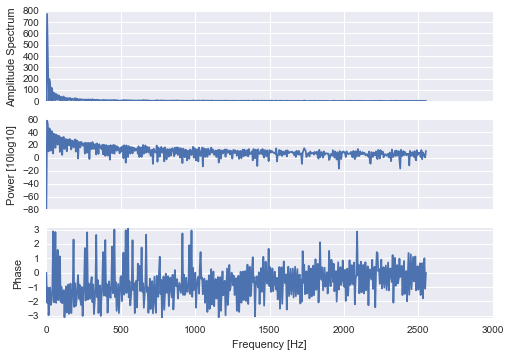

In [12]:
T.power_spectrum()

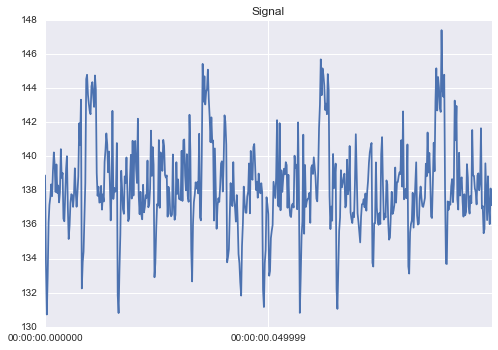

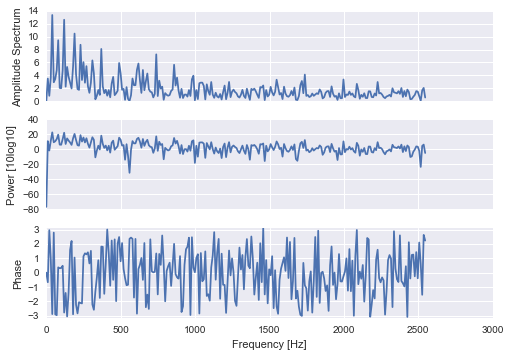

In [13]:
# Working on subset of data
# seconds start counting on 1970-01-01
df = T.power_as_df(total=True)
pv.power_spectrum(df.ix[:df.index.asof("1970-01-01 00:00:00.1")])

(1, [505])

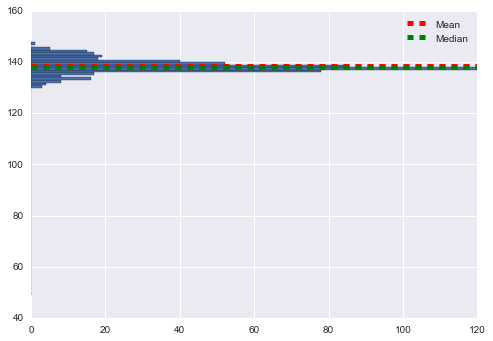

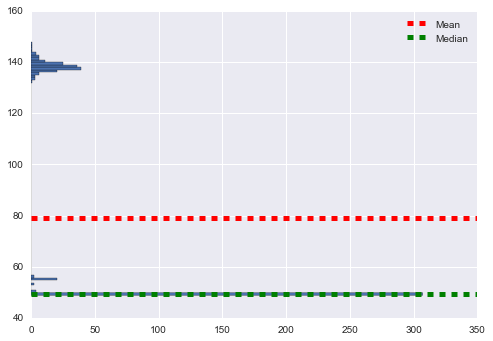

In [14]:
# Parameters clearly not tweaked for this
T.detect_segments()

{u'sensor_12v': 23.550127,
 u'sensor_3v3': 10.94273,
 u'sensor_5v': 15.279408,
 u'sensor_cpu0': 40.457916,
 u'sensor_cpu1': 46.713421,
 u'sensor_dram00': 0.44148818,
 u'sensor_dram01': 0.43932322,
 u'sensor_dram10': 0.23254003,
 u'sensor_dram11': 0.24882804}

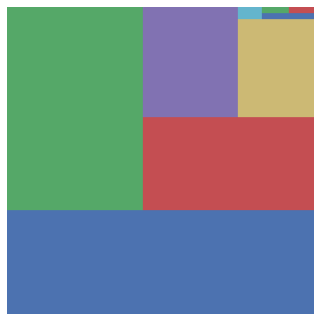

In [15]:
# mean power is proportional to energy
data = {name:sensor["mean"] for name, sensor in T.aggregate().items()}
pv.square_pie(data)
data

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10).corr(other=<Series>)


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:21: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50).corr(other=<Series>)


/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100).corr(other=<Series>)


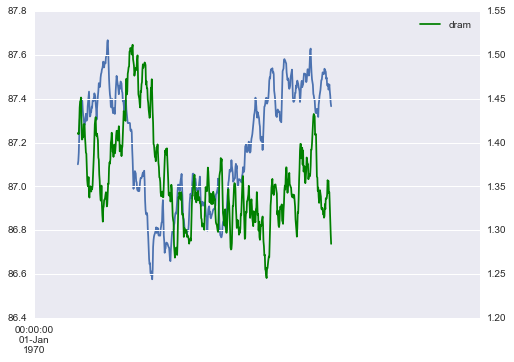

In [16]:
# DRAM VS CPU
# 1st plot rolling mean total CPU and total DRAM power on two axes
# 2nd plot rolling correations for 10, 50, 100 windows
df = T.power_as_df()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

pd.rolling_mean(df[["sensor_cpu0", "sensor_cpu1"]].sum(axis=1),
                100).plot(ax=ax1)
plt.legend(["cpu"])
pd.rolling_mean(df[[_ for _ in df.columns if "dram" in _]].sum(axis=1),
                100).plot(ax=ax2, color="g")
plt.legend(["dram"])

plt.figure()
pd.rolling_corr(df[["sensor_cpu0", "sensor_cpu1"]].sum(axis=1),
                df[[_ for _ in df.columns if "dram" in _]].sum(axis=1),
                window=10).plot()
pd.rolling_corr(df[["sensor_cpu0", "sensor_cpu1"]].sum(axis=1),
                df[[_ for _ in df.columns if "dram" in _]].sum(axis=1),
                window=50).plot()
pd.rolling_corr(df[["sensor_cpu0", "sensor_cpu1"]].sum(axis=1),
                df[[_ for _ in df.columns if "dram" in _]].sum(axis=1),
                window=100).plot()
plt.legend(["corr_10", "corr_50", "corr_100"])

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=100,center=True).corr(other=<Series>)


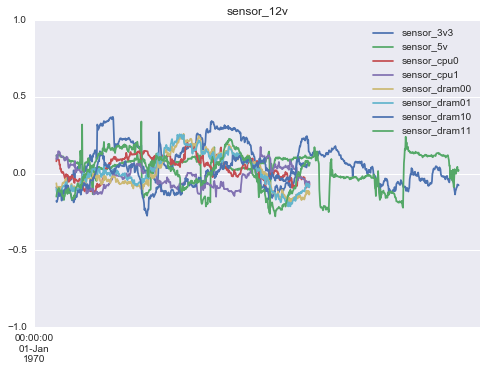

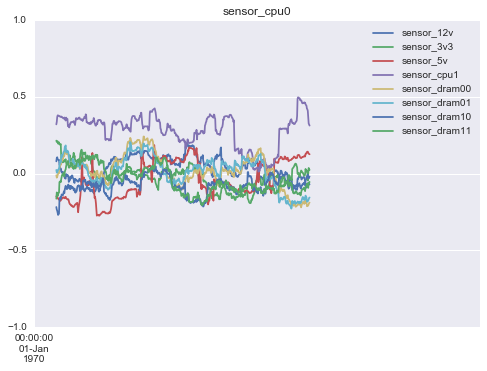

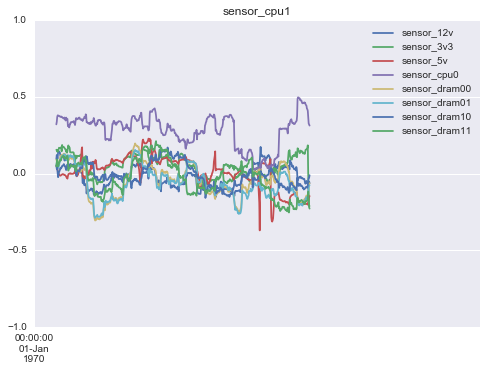

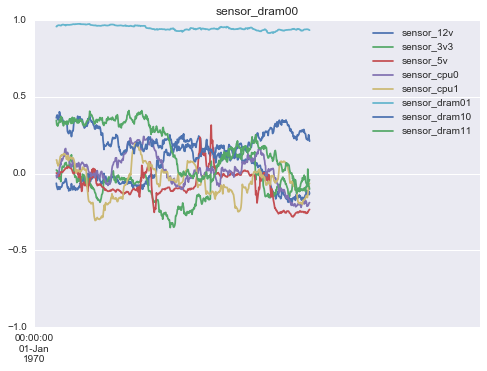

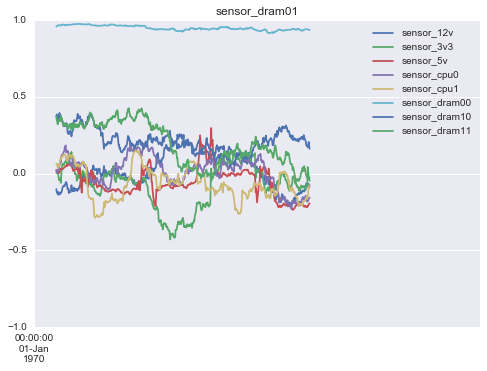

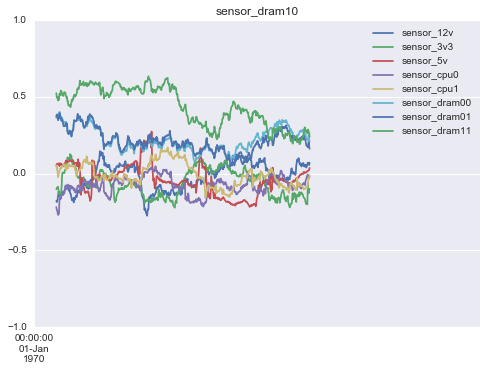

In [17]:
# Pairwise correlation of all sensors against one sensor. The one sensor is in the title.
# Only insight: Drams 00 & 01 and 10 & 11 are refreshed together?

for column in df:
    pd.rolling_corr(df, df[column], window=100, center=True).drop(column, axis=1).plot(title=column, ylim=[-1,1])

# Multisample


In [18]:
from glob import glob

files = glob("data/AdeptDataForPatrick/multisample/*/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5")
print files
MS = pv.Multisample(files)
MS

['data/AdeptDataForPatrick/multisample/1/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5', 'data/AdeptDataForPatrick/multisample/2/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5', 'data/AdeptDataForPatrick/multisample/3/kernel_blas_op_dmv_float_size_80000_reps_1.hdf5']


<powervisualisation.multisample.Multisample instance at 0x111f1e5a8>

In [19]:
MS.power_as_df(mean_only=False).head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">sensor_12v</th>
      <th colspan="2" halign="left">sensor_3v3</th>
      <th colspan="2" halign="left">sensor_5v</th>
      <th colspan="2" halign="left">sensor_cpu0</th>
      <th colspan="2" halign="left">sensor_cpu1</th>
      <th colspan="2" halign="left">sensor_dram00</th>
      <th colspan="2" halign="left">sensor_dram01</th>
      <th colspan="2" halign="left">sensor_dram10</th>
      <th colspan="2" halign="left">sensor_dram11</th>
    </tr>
    <tr>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1970-01-01 00:00:00.000</th>
      <td>23.578869</td>
      <td>0.147893</td>
      <td>10.946632</td>
      <td>0.019903</td>
      <td>15.177339</td>
      <td>2.315028</td>
      <td>24.965418</td>
      <td>0.302058</td>
      <td>22.538204</td>
      <td>1.644041</td>
      <td>0.131155</td>
      <td>0.107438</td>
      <td>0.150327</td>
      <td>0.114626</td>
      <td>0.695264</td>
      <td>0.064498</td>
      <td>0.652584</td>
      <td>0.044317</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.050</th>
      <td>23.583256</td>
      <td>0.124689</td>
      <td>10.949516</td>
      <td>0.016694</td>
      <td>14.155693</td>
      <td>0.097254</td>
      <td>24.904978</td>
      <td>0.302831</td>
      <td>23.079546</td>
      <td>1.012085</td>
      <td>0.190418</td>
      <td>0.162582</td>
      <td>0.201404</td>
      <td>0.131974</td>
      <td>0.689458</td>
      <td>0.040937</td>
      <td>0.653203</td>
      <td>0.027392</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.100</th>
      <td>23.554102</td>
      <td>0.089654</td>
      <td>10.946729</td>
      <td>0.014456</td>
      <td>15.077516</td>
      <td>2.127954</td>
      <td>24.923994</td>
      <td>0.281887</td>
      <td>22.954533</td>
      <td>1.204581</td>
      <td>0.124579</td>
      <td>0.073521</td>
      <td>0.204992</td>
      <td>0.117872</td>
      <td>0.700270</td>
      <td>0.055640</td>
      <td>0.655249</td>
      <td>0.048581</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.150</th>
      <td>23.553400</td>
      <td>0.112048</td>
      <td>10.952776</td>
      <td>0.034930</td>
      <td>14.483446</td>
      <td>1.404179</td>
      <td>25.132929</td>
      <td>0.337332</td>
      <td>23.287676</td>
      <td>0.866445</td>
      <td>0.144883</td>
      <td>0.119995</td>
      <td>0.159220</td>
      <td>0.105447</td>
      <td>0.700925</td>
      <td>0.040334</td>
      <td>0.649274</td>
      <td>0.035095</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.200</th>
      <td>23.523642</td>
      <td>0.134344</td>
      <td>10.936520</td>
      <td>0.012627</td>
      <td>14.875057</td>
      <td>1.725062</td>
      <td>25.038857</td>
      <td>0.251417</td>
      <td>22.962215</td>
      <td>1.504326</td>
      <td>0.168084</td>
      <td>0.117479</td>
      <td>0.227310</td>
      <td>0.145944</td>
      <td>0.680499</td>
      <td>0.080346</td>
      <td>0.647292</td>
      <td>0.058682</td>
    </tr>
  </tbody>
</table>
</div>

In [20]:
MS.power_as_df().head()

<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sensor_12v</th>
      <th>sensor_3v3</th>
      <th>sensor_5v</th>
      <th>sensor_cpu0</th>
      <th>sensor_cpu1</th>
      <th>sensor_dram00</th>
      <th>sensor_dram01</th>
      <th>sensor_dram10</th>
      <th>sensor_dram11</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1970-01-01 00:00:00.000</th>
      <td>23.578869</td>
      <td>10.946632</td>
      <td>15.177339</td>
      <td>24.965418</td>
      <td>22.538204</td>
      <td>0.131155</td>
      <td>0.150327</td>
      <td>0.695264</td>
      <td>0.652584</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.050</th>
      <td>23.583256</td>
      <td>10.949516</td>
      <td>14.155693</td>
      <td>24.904978</td>
      <td>23.079546</td>
      <td>0.190418</td>
      <td>0.201404</td>
      <td>0.689458</td>
      <td>0.653203</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.100</th>
      <td>23.554102</td>
      <td>10.946729</td>
      <td>15.077516</td>
      <td>24.923994</td>
      <td>22.954533</td>
      <td>0.124579</td>
      <td>0.204992</td>
      <td>0.700270</td>
      <td>0.655249</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.150</th>
      <td>23.553400</td>
      <td>10.952776</td>
      <td>14.483446</td>
      <td>25.132929</td>
      <td>23.287676</td>
      <td>0.144883</td>
      <td>0.159220</td>
      <td>0.700925</td>
      <td>0.649274</td>
    </tr>
    <tr>
      <th>1970-01-01 00:00:00.200</th>
      <td>23.523642</td>
      <td>10.936520</td>
      <td>14.875057</td>
      <td>25.038857</td>
      <td>22.962215</td>
      <td>0.168084</td>
      <td>0.227310</td>
      <td>0.680499</td>
      <td>0.647292</td>
    </tr>
  </tbody>
</table>
</div>

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


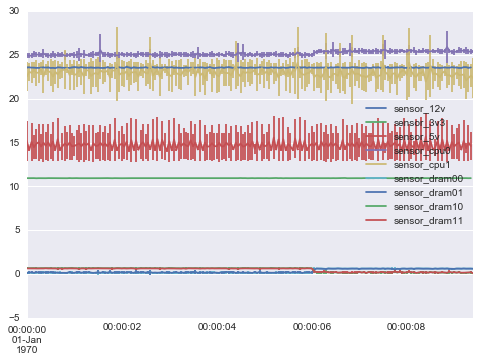

In [21]:
MS.plot()